In [3]:
import os
import pandas as pd
from nltk.tokenize import word_tokenize
import re
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager


Read in the highest probability words per topic model.

In [4]:
def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)

In [5]:
path = find('Topwords.xlsx', 'D://ProcessedData')

In [8]:
data10 = pd.read_excel(path,sheet_name='10words', header=None, names=['Topic','Nr', 'TW', 'Concat','Row', 'Words'])
data20 = pd.read_excel(path,sheet_name='20words', header=None, names=['Topic','Nr', 'TW', 'Concat','Row', 'Words'])
data30 = pd.read_excel(path,sheet_name='30words', header=None, names=['Topic','Nr', 'TW', 'Concat','Row', 'Words'])
data40 = pd.read_excel(path,sheet_name='40words', header=None, names=['Topic','Nr', 'TW', 'Concat','Row', 'Words'])
data50 = pd.read_excel(path,sheet_name='50words', header=None, names=['Topic','Nr', 'TW', 'Concat','Row', 'Words'])
data60 = pd.read_excel(path,sheet_name='60words', header=None, names=['Topic','Nr', 'TW', 'Concat','Row', 'Words'])
data70 = pd.read_excel(path,sheet_name='70words', header=None, names=['Topic','Nr', 'TW', 'Concat','Row', 'Words'])
data75 = pd.read_excel(path,sheet_name='75words', header=None, names=['Topic','Nr', 'TW', 'Concat','Row', 'Words'])
data80 = pd.read_excel(path,sheet_name='80words', header=None, names=['Topic','Nr', 'TW', 'Concat','Row', 'Words'])
data90 = pd.read_excel(path,sheet_name='90words', header=None, names=['Topic','Nr', 'TW', 'Concat','Row', 'Words'])
data100 = pd.read_excel(path,sheet_name='100words', header=None, names=['Topic','Nr', 'TW', 'Concat','Row', 'Words'])

Combine the different lists.

In [33]:
dataset = [data10, data20, data30,data40, data50, data60, data70,data75, data80, data90, data100]

Clean the data by tokenizing the words.

In [34]:
for item in dataset:
    data =item
    for index, row in data.iterrows():
        words = data.iloc[index]['Words'].replace('Highest Prob:',"")
        words = words.split(',')
        words =[w.strip() for w in words]
        data.at[index, 'Words'] = words

Only keep the top five unigrams per model.

In [38]:
for item in dataset:
    data = item
    data['top_five']=""
    for index, row in data.iterrows():
        words = data.iloc[index]['Words']
        for word in words:
            if "_" in word:
                words.remove(word)
        data.at[index, "top_five"] = words[0:5]

Read in the cleaned website data, append all texts to one string and tokenize this string.

In [40]:
text = pd.read_csv('D:/ProcessedData/TokenizedAllScraperNewest8.csv')

In [41]:
total_text = str()
for index, row in text.iterrows():
    t = text.iloc[index]['clean_text']
    total_text += t+ ' '
total_text = word_tokenize(total_text)

Function to compute the Jaccard Index between the top five words of two models by dividing their intersection through the union.

In [43]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

Loop over the models and compute the Jaccard Indices of the models.

In [44]:
jaccard = dict()
for item in dataset:
    data=item
    scores = pd.DataFrame(index=data['Nr'], columns=data['Nr'])
    for index1, topic1 in data.iterrows():
        one = data.iloc[index1]['top_five']
        t1 = data.iloc[index1]['Nr']
        for index2, topic2 in data.iterrows():
            if index1 != index2:
                similarities=list()
                two = data.iloc[index2]['top_five']
                t2 = data.iloc[index2]['Nr']
                for i in range(1,len(one)+1):
                    l1 = one[0:i]
                    l2 = two[0:i]
                    similarities.append(jaccard_similarity(l1, l2))
                scores.at[t1,t2] = sum(similarities)/len(similarities)
    jaccard[len(item)] = scores

Compute the average Jaccard Index per model.

In [46]:
jaccard_scores = list()
jaccard_scores.append(sum(jaccard[10].mean(axis=0))/10)
jaccard_scores.append(sum(jaccard[20].mean(axis=0))/20)
jaccard_scores.append(sum(jaccard[30].mean(axis=0))/30)
jaccard_scores.append(sum(jaccard[40].mean(axis=0))/40)
jaccard_scores.append(sum(jaccard[50].mean(axis=0))/50)
jaccard_scores.append(sum(jaccard[60].mean(axis=0))/60)
jaccard_scores.append(sum(jaccard[70].mean(axis=0))/70)
jaccard_scores.append(sum(jaccard[80].mean(axis=0))/80)
jaccard_scores.append(sum(jaccard[90].mean(axis=0))/90)
jaccard_scores.append(sum(jaccard[100].mean(axis=0))/100)

Plot the average Jaccard Index per model.

([<matplotlib.axis.XTick at 0x16b00595eb8>,
 <a list of 10 Text xticklabel objects>)

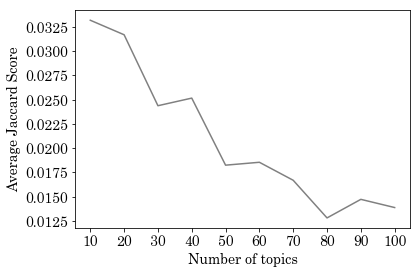

In [54]:
plt.plot(np.arange(10,110,10), jaccard_scores, label="Average Jaccard Score", color="gray")
plt.ylabel('Average Jaccard Score', fontname="century", fontsize=14)
plt.xlabel('Number of topics', fontname="century",fontsize=14)
plt.xticks(fontname="century", fontsize=14)
plt.yticks(fontname="century", fontsize=14)
plt.xticks(np.arange(10,110,10))

Compute the Normalized Pointwise Mutual Information per model by comparing how often the model's top five words occur in the same window.

In [48]:
pmi_scores = dict()
pmi_means = dict()
pmi_medians = dict()
for item in dataset:
    data = item
    pmis = list()
    print(len(item))
    for index, row in data.iterrows():
        print(index)
        words = data.iloc[index]['top_five']
        processed_words = list()
        pmi = 0
        for word1 in words:
            processed_words.append(word1)
            print(processed_words)
            matching_indices = [i for i, x in enumerate(total_text) if x==word1]
            for word2 in words:
                if word2 not in processed_words:
                    matching_indices2 = [i for i, x in enumerate(total_text) if x==word2]
                    co_occur=0
                    no_co_occur=0
                    for match in matching_indices:
                        indices_before = match-5
                        indices_after = match+6
                        window_before = total_text[indices_before:match]
                        window_after = total_text[match+1:indices_after]

                        if word2 in window_before:
                            co_occur +=1
                        if word2 in window_after:
                            co_occur+=1


                    p_w1_w2 = co_occur/len(total_text)
                    p_w1 = len(matching_indices)/len(total_text)
                    p_w2 = len(matching_indices2)/len(total_text)

                    if co_occur>0:
                        denominator = -1*math.log(co_occur/len(total_text))
                        pmi += (math.log(p_w1_w2/(p_w1*p_w2)))/denominator

        pmis.append(pmi)
    pmi_scores[len(item)] = pmis
    pmi_means[len(item)] = statistics.mean(pmis)
    pmi_medians[len(item)] = statistics.median(pmis)

10
0
['cover']
['cover', 'hospital']
['cover', 'hospital', 'treatment']
['cover', 'hospital', 'treatment', 'health']
['cover', 'hospital', 'treatment', 'health', 'pay']
1
['plan']
['plan', 'drug']
['plan', 'drug', 'prescription']
['plan', 'drug', 'prescription', 'coverage']
['plan', 'drug', 'prescription', 'coverage', 'pharmacy']
2
['care']
['care', 'patient']
['care', 'patient', 'medical']
['care', 'patient', 'medical', 'service']
['care', 'patient', 'medical', 'service', 'provide']
3
['help']
['help', 'health']
['help', 'health', 'good']
['help', 'health', 'good', 'healthy']
['help', 'health', 'good', 'healthy', 'disease']
4
['plan']
['plan', 'insurance']
['plan', 'insurance', 'coverage']
['plan', 'insurance', 'coverage', 'benefit']
['plan', 'insurance', 'coverage', 'benefit', 'health']
5
['community']
['community', 'support']
['community', 'support', 'work']
['community', 'support', 'work', 'people']
['community', 'support', 'work', 'people', 'program']
6
['insurance']
['insurance',

20
['insurance']
['insurance', 'coverage']
['insurance', 'coverage', 'risk']
['insurance', 'coverage', 'risk', 'cover']
['insurance', 'coverage', 'risk', 'cover', 'liability']
21
['cover']
['cover', 'hospital']
['cover', 'hospital', 'health']
['cover', 'hospital', 'health', 'benefit']
['cover', 'hospital', 'health', 'benefit', 'private']
22
['health']
['health', 'employee']
['health', 'employee', 'benefit']
['health', 'employee', 'benefit', 'help']
['health', 'employee', 'benefit', 'help', 'program']
23
['travel']
['travel', 'cover']
['travel', 'cover', 'insurance']
['travel', 'cover', 'insurance', 'policy']
['travel', 'cover', 'insurance', 'policy', 'trip']
24
['risk']
['risk', 'market']
['risk', 'market', 'world']
['risk', 'market', 'world', 'global']
['risk', 'market', 'world', 'global', 'business']
25
['health']
['health', 'tooth']
['health', 'tooth', 'disease']
['health', 'tooth', 'disease', 'help']
['health', 'tooth', 'disease', 'help', 'heart']
26
['plan']
['plan', 'insurance']


['cancer', 'surgery']
['cancer', 'surgery', 'procedure']
['cancer', 'surgery', 'procedure', 'test']
['cancer', 'surgery', 'procedure', 'test', 'treatment']
1
['worker']
['worker', 'safety']
['worker', 'safety', 'compensation']
['worker', 'safety', 'compensation', 'employee']
['worker', 'safety', 'compensation', 'employee', 'business']
2
['client']
['client', 'service']
['client', 'service', 'provide']
['client', 'service', 'provide', 'solution']
['client', 'service', 'provide', 'solution', 'team']
3
['app']
['app', 'information']
['app', 'information', 'mobile']
['app', 'information', 'mobile', 'user']
['app', 'information', 'mobile', 'user', 'web']
4
['care']
['care', 'home']
['care', 'home', 'need']
['care', 'home', 'need', 'family']
['care', 'home', 'need', 'family', 'resident']
5
['retirement']
['retirement', 'plan']
['retirement', 'plan', 'financial']
['retirement', 'plan', 'financial', 'help']
['retirement', 'plan', 'financial', 'help', 'saving']
6
['provide']
['provide', 'reinsu

60
0
['cancer']
['cancer', 'surgery']
['cancer', 'surgery', 'test']
['cancer', 'surgery', 'test', 'procedure']
['cancer', 'surgery', 'test', 'procedure', 'treatment']
1
['mental']
['mental', 'safety']
['mental', 'safety', 'depression']
['mental', 'safety', 'depression', 'webinar']
['mental', 'safety', 'depression', 'webinar', 'stress']
2
['service']
['service', 'product']
['service', 'product', 'customer']
['service', 'product', 'customer', 'client']
['service', 'product', 'customer', 'client', 'provide']
3
['information']
['information', 'review']
['information', 'review', 'health']
['information', 'review', 'health', 'feedback']
['information', 'review', 'health', 'feedback', 'accessibility']
4
['care']
['care', 'home']
['care', 'home', 'family']
['care', 'home', 'family', 'need']
['care', 'home', 'family', 'need', 'help']
5
['medical']
['medical', 'expert']
['medical', 'expert', 'good']
['medical', 'expert', 'good', 'treatment']
['medical', 'expert', 'good', 'treatment', 'pregnancy'

['retirement', 'financial', 'plan', 'help']
['retirement', 'financial', 'plan', 'help', 'advisor']
50
['health']
['health', 'treatment']
['health', 'treatment', 'centre']
['health', 'treatment', 'centre', 'insurance']
['health', 'treatment', 'centre', 'insurance', 'cash']
51
['tax']
['tax', 'fund']
['tax', 'fund', 'income']
['tax', 'fund', 'income', 'pension']
['tax', 'fund', 'income', 'pension', 'plan']
52
['care']
['care', 'patient']
['care', 'patient', 'provide']
['care', 'patient', 'provide', 'service']
['care', 'patient', 'provide', 'service', 'medical']
53
['insurance']
['insurance', 'health']
['insurance', 'health', 'insurance_plan']
['insurance', 'health', 'insurance_plan', 'help']
['insurance', 'health', 'insurance_plan', 'help', 'find']
54
['employee']
['employee', 'benefit']
['employee', 'benefit', 'business']
['employee', 'benefit', 'business', 'employer']
['employee', 'benefit', 'business', 'employer', 'help']
55
['risk']
['risk', 'insurance']
['risk', 'insurance', 'busine

['health', 'care', 'service', 'member', 'program']
40
['location']
['location', 'appointment']
['location', 'appointment', 'office']
['location', 'appointment', 'office', 'search']
['location', 'appointment', 'office', 'search', 'locate']
41
['market']
['market', 'rate']
['market', 'rate', 'increase']
['market', 'rate', 'increase', 'result']
['market', 'rate', 'increase', 'result', 'percent']
42
['care']
['care', 'pet']
['care', 'pet', 'stone']
['care', 'pet', 'stone', 'family']
['care', 'pet', 'stone', 'family', 'dog']
43
['online']
['online', 'account']
['online', 'account', 'access']
['online', 'account', 'access', 'card']
['online', 'account', 'access', 'card', 'information']
44
['employee']
['employee', 'benefit']
['employee', 'benefit', 'employer']
['employee', 'benefit', 'employer', 'plan']
['employee', 'benefit', 'employer', 'plan', 'group']
45
['join']
['join', 'serve']
['join', 'serve', 'prior']
['join', 'serve', 'prior', 'experience']
['join', 'serve', 'prior', 'experience',

['report', 'corporate', 'business', 'company', 'standard']
20
['insurance']
['insurance', 'liability']
['insurance', 'liability', 'business']
['insurance', 'liability', 'business', 'coverage']
['insurance', 'liability', 'business', 'coverage', 'cover']
21
['information']
['information', 'require']
['information', 'require', 'provide']
['information', 'require', 'provide', 'application']
['information', 'require', 'provide', 'application', 'request']
22
['health']
['health', 'help']
['health', 'help', 'healthy']
['health', 'help', 'healthy', 'tool']
['health', 'help', 'healthy', 'tool', 'resource']
23
['travel']
['travel', 'country']
['travel', 'country', 'emergency']
['travel', 'country', 'emergency', 'medical']
['travel', 'country', 'emergency', 'medical', 'world']
24
['project']
['project', 'equipment']
['project', 'equipment', 'energy']
['project', 'equipment', 'energy', 'cargo']
['project', 'equipment', 'energy', 'cargo', 'supply']
25
['disease']
['disease', 'heart']
['disease', 'h

['insurance', 'health', 'help', 'need', 'plan']
70
['hospital']
['hospital', 'room']
['hospital', 'room', 'patient']
['hospital', 'room', 'patient', 'available']
['hospital', 'room', 'patient', 'available', 'locate']
71
['information']
['information', 'fraud']
['information', 'fraud', 'personal']
['information', 'fraud', 'personal', 'protect']
['information', 'fraud', 'personal', 'protect', 'use']
72
['food']
['food', 'eat']
['food', 'eat', 'healthy']
['food', 'eat', 'healthy', 'drink']
['food', 'eat', 'healthy', 'drink', 'recipe']
73
['information']
['information', 'online']
['information', 'online', 'access']
['information', 'online', 'access', 'update']
['information', 'online', 'access', 'update', 'available']
74
['home']
['home', 'car']
['home', 'car', 'insurance']
['home', 'car', 'insurance', 'cover']
['home', 'car', 'insurance', 'cover', 'vehicle']
80
0
['cancer']
['cancer', 'test']
['cancer', 'test', 'surgery']
['cancer', 'test', 'surgery', 'procedure']
['cancer', 'test', 'surg

['employer', 'group', 'plan', 'coverage']
['employer', 'group', 'plan', 'coverage', 'health']
45
['join']
['join', 'serve']
['join', 'serve', 'experience']
['join', 'serve', 'experience', 'prior']
['join', 'serve', 'experience', 'prior', 'hold']
46
['plan']
['plan', 'coverage']
['plan', 'coverage', 'enrollment']
['plan', 'coverage', 'enrollment', 'enroll']
['plan', 'coverage', 'enrollment', 'enroll', 'eligible']
47
['health']
['health', 'healthy']
['health', 'healthy', 'weight']
['health', 'healthy', 'weight', 'diabetes']
['health', 'healthy', 'weight', 'diabetes', 'exercise']
48
['help']
['help', 'information']
['help', 'information', 'tool']
['help', 'information', 'tool', 'health']
['help', 'information', 'tool', 'health', 'resource']
49
['retirement']
['retirement', 'financial']
['retirement', 'financial', 'plan']
['retirement', 'financial', 'plan', 'help']
['retirement', 'financial', 'plan', 'help', 'advisor']
50
['story']
['story', 'change']
['story', 'change', 'world']
['story',

['community', 'volunteer', 'health', 'organization', 'support']
15
['form']
['form', 'complete']
['form', 'complete', 'claim']
['form', 'complete', 'claim', 'submit']
['form', 'complete', 'claim', 'submit', 'request']
16
['care']
['care', 'family']
['care', 'family', 'nurse']
['care', 'family', 'nurse', 'need']
['care', 'family', 'nurse', 'need', 'help']
17
['plan']
['plan', 'benefit']
['plan', 'benefit', 'information']
['plan', 'benefit', 'information', 'provide']
['plan', 'benefit', 'information', 'provide', 'health']
18
['diversity']
['diversity', 'supplier']
['diversity', 'supplier', 'veteran']
['diversity', 'supplier', 'veteran', 'diverse']
['diversity', 'supplier', 'veteran', 'diverse', 'business']
19
['hospital']
['hospital', 'patient']
['hospital', 'patient', 'gift']
['hospital', 'patient', 'gift', 'hospitalist']
['hospital', 'patient', 'gift', 'hospitalist', 'performance']
20
['disaster']
['disaster', 'business']
['disaster', 'business', 'risk']
['disaster', 'business', 'risk'

65
['event']
['event', 'class']
['event', 'class', 'attend']
['event', 'class', 'attend', 'arthritis']
['event', 'class', 'attend', 'arthritis', 'session']
66
['share']
['share', 'fund']
['share', 'fund', 'shareholder']
['share', 'fund', 'shareholder', 'million']
['share', 'fund', 'shareholder', 'million', 'financial']
67
['health']
['health', 'care']
['health', 'care', 'people']
['health', 'care', 'people', 'system']
['health', 'care', 'people', 'system', 'help']
68
['exercise']
['exercise', 'sleep']
['exercise', 'sleep', 'stress']
['exercise', 'sleep', 'stress', 'body']
['exercise', 'sleep', 'stress', 'body', 'help']
69
['cover']
['cover', 'health']
['cover', 'health', 'insurance']
['cover', 'health', 'insurance', 'treatment']
['cover', 'health', 'insurance', 'treatment', 'international']
70
['program']
['program', 'support']
['program', 'support', 'student']
['program', 'support', 'student', 'research']
['program', 'support', 'student', 'research', 'training']
71
['information']
['i

['cargo', 'food', 'vessel', 'security']
['cargo', 'food', 'vessel', 'security', 'supply']
25
['pain']
['pain', 'cause']
['pain', 'cause', 'symptom']
['pain', 'cause', 'symptom', 'disease']
['pain', 'cause', 'symptom', 'disease', 'treatment']
26
['insurance']
['insurance', 'plan']
['insurance', 'plan', 'health']
['insurance', 'plan', 'health', 'option']
['insurance', 'plan', 'health', 'option', 'coverage']
27
['event']
['event', 'post']
['event', 'post', 'team']
['event', 'post', 'team', 'sport']
['event', 'post', 'team', 'sport', 'world']
28
['dental']
['dental', 'tooth']
['dental', 'tooth', 'dentist']
['dental', 'tooth', 'dentist', 'oral']
['dental', 'tooth', 'dentist', 'oral', 'treatment']
29
['help']
['help', 'good']
['help', 'good', 'work']
['help', 'good', 'work', 'like']
['help', 'good', 'work', 'like', 'way']
30
['plan']
['plan', 'benefit']
['plan', 'benefit', 'coverage']
['plan', 'benefit', 'coverage', 'group']
['plan', 'benefit', 'coverage', 'group', 'employer']
31
['people']


['insurance', 'life', 'illness', 'policy']
['insurance', 'life', 'illness', 'policy', 'pay']
75
['product']
['product', 'service']
['product', 'service', 'customer']
['product', 'service', 'customer', 'offer']
['product', 'service', 'customer', 'offer', 'provide']
76
['information']
['information', 'provide']
['information', 'provide', 'include']
['information', 'provide', 'include', 'policy']
['information', 'provide', 'include', 'policy', 'require']
77
['coverage']
['coverage', 'insurance']
['coverage', 'insurance', 'property']
['coverage', 'insurance', 'property', 'offer']
['coverage', 'insurance', 'property', 'offer', 'provide']
78
['announce']
['announce', 'release']
['announce', 'release', 'press']
['announce', 'release', 'press', 'business']
['announce', 'release', 'press', 'business', 'reserve']
79
['policy']
['policy', 'insurance']
['policy', 'insurance', 'cover']
['policy', 'insurance', 'cover', 'car']
['policy', 'insurance', 'cover', 'car', 'insure']
80
['plan']
['plan', 'co

In [49]:
means = list()
medians = list()
for mean in pmi_means:
    if mean is not 75:
        means.append(pmi_means[mean])
for median in pmi_medians:
    if median is not 75:
        medians.append(pmi_medians[median])

Plot the mean and median PMIs per model.

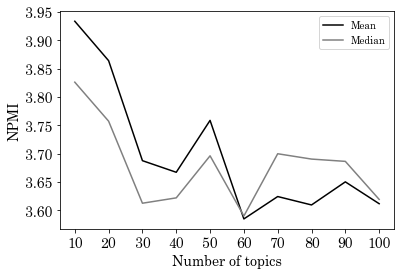

In [78]:
plt.plot(np.arange(10,110,10), means, color="black", label="Mean")
plt.plot(np.arange(10,110,10), medians, color="gray", label="Median")
plt.ylabel('NPMI', fontname="century", fontsize=14)
plt.xlabel('Number of topics', fontname="century",fontsize=14)
plt.xticks(fontname="century", fontsize=14)
plt.yticks(fontname="century", fontsize=14)
plt.xticks(np.arange(10,110,10))
font = font_manager.FontProperties(family='century')
plt.legend(prop=font)